In [1]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv
import tensorflow.compat.v2 as tf 

import b_meson_fit.signal as bmfs  
import b_meson_fit.breit_wigner as bmfb
import b_meson_fit as bmf

In [2]:
bmf.stdout(
    'Integrated values between +/- 100 MeV of K892 mass: K892: {} K700: {} Mix: {}'.format(
        bmf.breit_wigner.k892_distribution_integrated(),
        bmf.breit_wigner.k700_distribution_integrated(),
        bmf.breit_wigner.k700_k892_distribution_integrated()
    )
)

Integrated values between +/- 100 MeV of K892 mass: K892: 0.8878987431526184 K700: 0.29567646980285645 Mix: (0.639614999294281+0.009679198265075684j)


In [3]:
# See p49 of 2018 PDG - K*0(700)
import tensorflow.compat.v2 as tf 

####      Swave component:        ####

mass_k700 = tf.constant(0.824)  # 824 MeV
decay_width_k700 = tf.constant(0.478)  # 478 MeV


# See p49 of 2018 PDG - K*0(1430)
mass_k1430 = tf.constant(1.425)
decay_width_k1430 = tf.constant(0.270)
print(mass_k1430)



####      P-wave component:        ####

# See p49 of 2018 PDG - K*0(892)
mass_k892 = tf.constant(0.89555)  # 895.55 MeV
decay_width_k892 = tf.constant(0.0473)  # 47.3 MeV



####  Integration and other masses ####


mass_k_plus = tf.constant(0.493677)  # 493.677 MeV
mass_pi_minus = tf.constant(0.13957018)  # 139.57018 MeV

integration_max = tf.constant(100.0)
integration_dt = tf.constant(0.00025)


tf.Tensor(1.425, shape=(), dtype=float32)


In [4]:
masses = tf.linspace(bmf.breit_wigner.mass_k_plus + bmf.breit_wigner.mass_pi_minus + 0.01, 2.0, 150)

k700 = bmf.breit_wigner.k700_distribution(masses)
k892 = bmf.breit_wigner.k892_distribution(masses)
mix = tf.math.abs(bmf.breit_wigner.k700_k892_distribution(masses))

print(masses)

tf.Tensor(
[0.6432471  0.65235287 0.66145855 0.6705643  0.67967004 0.6887758
 0.69788146 0.7069872  0.71609294 0.7251986  0.73430437 0.7434101
 0.7525158  0.76162153 0.7707273  0.77983296 0.7889387  0.79804444
 0.8071502  0.81625587 0.8253616  0.83446735 0.8435731  0.8526788
 0.8617845  0.87089026 0.87999594 0.8891017  0.8982074  0.9073131
 0.91641885 0.9255246  0.9346303  0.943736   0.95284176 0.96194744
 0.97105324 0.9801589  0.9892646  0.9983704  1.0074761  1.0165818
 1.0256876  1.0347933  1.043899   1.0530047  1.0621104  1.0712161
 1.0803219  1.0894276  1.0985334  1.1076391  1.1167448  1.1258506
 1.1349562  1.144062   1.1531677  1.1622734  1.1713791  1.1804848
 1.1895906  1.1986964  1.207802   1.2169077  1.2260134  1.2351192
 1.2442249  1.2533307  1.2624364  1.2715421  1.2806478  1.2897536
 1.2988594  1.307965   1.3170707  1.3261764  1.3352821  1.3443879
 1.3534937  1.3625994  1.371705   1.3808107  1.3899165  1.3990222
 1.408128   1.4172337  1.4263394  1.4354451  1.4445509  1.45365

633.2471370697021
tf.Tensor(0.79555, shape=(), dtype=float32)


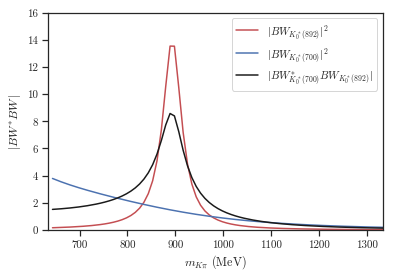

In [7]:
    import seaborn as sns
plt.figure()
# Set style as well as font to Computer Modern Roman to match LaTeX output
sns.set(style='ticks', font='cmr10', rc={'mathtext.fontset': 'cm', 'axes.unicode_minus': False})

plt.plot(masses.numpy() * 1000, k892.numpy(),'r-' , label=r'$ |BW_{K^*_0(892)}|^{2}$')
plt.plot(masses.numpy() * 1000, k700.numpy(),'b-', label=r'$ |BW_{K^*_0(700)}|^{2}$')
plt.plot(masses.numpy() * 1000, mix.numpy(), 'k-',label=r'$ |BW^{*}_{K^*_0(700)}BW_{K^*_0(892)}|$')
plt.xlabel(r'$ m_{K\pi}$'+' (MeV)')
plt.ylabel(r'$|BW^{*}BW \, |$')
lim=(mass_k_plus.numpy()+mass_pi_minus.numpy())*1000
print(lim)
print(mass_k892 - 0.1)
plt.xlim(lim,lim+700)
plt.ylim(0 , 16)
plt.margins(x=0)
plt.legend()
plt.axis()
plt.show()

In [8]:
print(bmf.breit_wigner.k70µ0_distribution.norm)
print(bmf.breit_wigner.k892_distribution.norm)


AttributeError: module 'b_meson_fit.breit_wigner' has no attribute 'k70μ0_distribution'

In [9]:
bmf.breit_wigner.k892_distribution_integrated()

<tf.Tensor: id=1391, shape=(), dtype=float32, numpy=0.88789874>

In [10]:
bmf.breit_wigner.k700_distribution_integrated()

<tf.Tensor: id=1474, shape=(), dtype=float32, numpy=0.29567647>

In [11]:
bmf.breit_wigner.k700_k892_distribution_integrated()

<tf.Tensor: id=1625, shape=(), dtype=complex64, numpy=(0.639615+0.009679198j)>